### Nivell 2
- Exercici 2
Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv


In [2]:
with open('movies.dat') as infile, open('movies.txt','w') as outfile: 
    for line in infile: 
        outfile.write(line.replace('::','|'))

In [3]:
with open('movies.txt') as infile, open('movies2.txt','w') as outfile: 
    for line in infile: 
        outfile.write(line.replace(',','_'))

In [4]:
with open('movies2.txt') as infile, open('movies.csv','w') as outfile: 
    for line in infile: 
        outfile.write(line.replace('|',','))
        

Ho he fet així, pas a pas, i m'ha funcionat, però he trobat una altre forma de solucionar-ho, molt més elegant, que he volgut afegir aquí com a referència:

movies = pd.read_csv('data/movies.dat', sep='::',
                     header=None, names=['movie_id', 'movie_title', 'genres'])

In [5]:
#He tingut problemes per obrir-ho fins q he trobat com decodificar-ho ;)

movies = pd.read_csv('movies.csv', encoding='iso-8859-1', index_col = 0, header = None, names = ['movie_id', 'movie_title', 'Type_1', 'Type_2','Type_3','Type_4', 'Type_5', 'Type_6'])
movies.head()

,movie_title,Type_1,Type_2,Type_3,Type_4,Type_5,Type_6
movie_id,,,,,,,
1,Toy Story (1995),Animation,Children's,Comedy,NaN,NaN,NaN
2,Jumanji (1995),Adventure,Children's,Fantasy,NaN,NaN,NaN
3,Grumpier Old Men (1995),Comedy,Romance,NaN,NaN,NaN,NaN
4,Waiting to Exhale (1995),Comedy,Drama,NaN,NaN,NaN,NaN
5,Father of the Bride Part II (1995),Comedy,NaN,NaN,NaN,NaN,NaN


In [6]:
#Ara q tenim el dataframe separarem del Movie title el Nom de pel.licula i any.

movies['Year'] = movies['movie_title'].str[-5:-1]
movies['Name']=movies['movie_title'].str[:-7]
movies.head()

,movie_title,Type_1,Type_2,Type_3,Type_4,Type_5,Type_6,Year,Name
movie_id,,,,,,,,,
1,Toy Story (1995),Animation,Children's,Comedy,NaN,NaN,NaN,1995,Toy Story
2,Jumanji (1995),Adventure,Children's,Fantasy,NaN,NaN,NaN,1995,Jumanji
3,Grumpier Old Men (1995),Comedy,Romance,NaN,NaN,NaN,NaN,1995,Grumpier Old Men
4,Waiting to Exhale (1995),Comedy,Drama,NaN,NaN,NaN,NaN,1995,Waiting to Exhale
5,Father of the Bride Part II (1995),Comedy,NaN,NaN,NaN,NaN,NaN,1995,Father of the Bride Part II


In [7]:
#He decidit passar els anys a int per fer després les gràfiques.
movies['Year']= movies['Year'].astype(int)

In [8]:
movies.shape


(3883, 9)

In [9]:
movies.ndim

2

In [10]:
movies.columns

Index(['movie_title', 'Type_1', 'Type_2', 'Type_3', 'Type_4', 'Type_5',
       'Type_6', 'Year', 'Name'],
      dtype='object')

In [11]:
movies.dtypes

movie_title    object
Type_1         object
Type_2         object
Type_3         object
Type_4         object
Type_5         object
Type_6         object
Year            int32
Name           object
dtype: object

Ara agruparé les dades de diverses formes per tal de poder fer un cert anàlisi:

Agrupant-les per any i tipus, podem veure quin tipus és més popular.

In [13]:
reviewed = movies.groupby(['Year','Type_1']).Type_1.agg([len])
reviewed=reviewed.reset_index()
reviewed.sort_values(by='Year', ascending=False)

,Year,Type_1,len
622,2000,Thriller,6
616,2000,Crime,4
611,2000,Action,19
612,2000,Adventure,4
613,2000,Animation,6
...,...,...,...
4,1921,Action,1
3,1920,Comedy,2
2,1919,Comedy,1
1,1919,Adventure,1


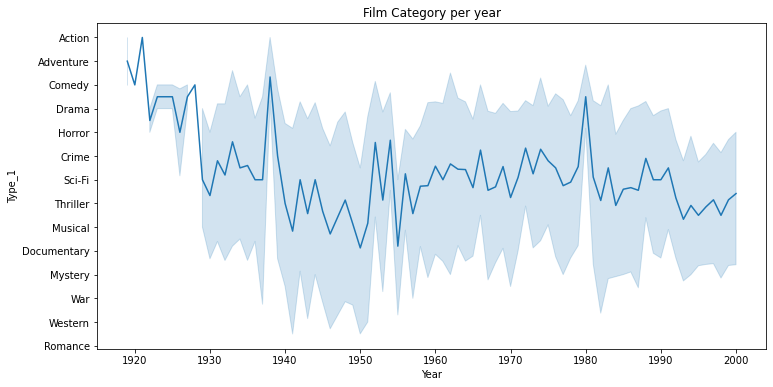

In [17]:
plt.figure(figsize=(12, 6))
plt.title('Film Category per year')
ax= sns.lineplot(data=reviewed, x='Year', y='Type_1')

Amb aquest gràfic, veiem d'una altre manera tant el número de le.licules com el tipus.

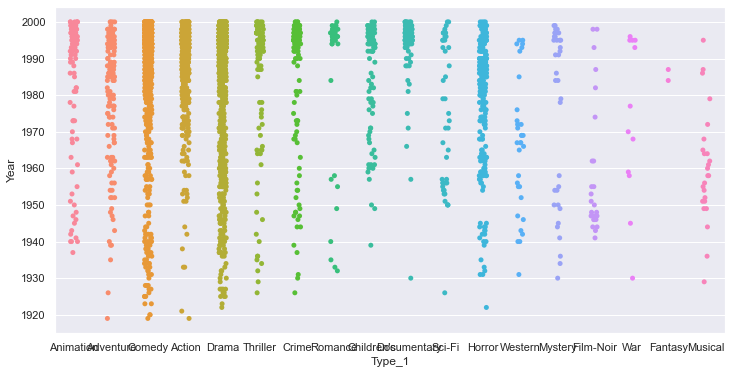

In [36]:
sns.set(rc={'figure.figsize':(12,6)})
ax= sns.stripplot(x ='Type_1',y ='Year', data = movies )

Concentració de pel.licules: el número de pel.licles registrades els darrers 20 anys és molt alt comparat amb les décades anteriors.

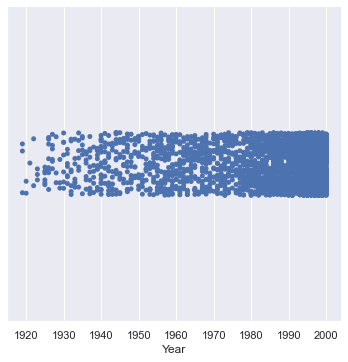

In [47]:
sns.set(rc={'figure.figsize':(12,6)})
ax=sns.catplot(x='Year', data= reviewed)

In [45]:
filmName= movies.groupby(['Year'], as_index=False)['Name'].count()
filmName

,Year,Name
0,1919,3
1,1920,2
2,1921,1
3,1922,2
4,1923,3
...,...,...
76,1996,345
77,1997,315
78,1998,337
79,1999,283


<Figure size 864x432 with 0 Axes>

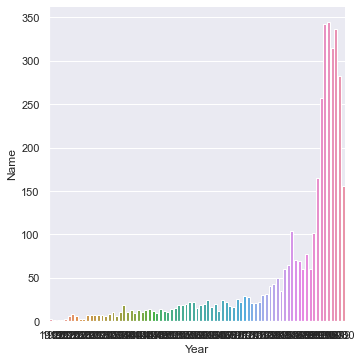

In [51]:
#sns.set(rc={'figure.figsize':(12,6)})
plt.figure(figsize=(12, 6))
sns.catplot(data=filmName, kind='bar', x='Year', y= 'Name')



Cosa que ens confirma el que ja havíem comentat.